# Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine

**Overview:**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days.

**Source:** https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd

In [2]:
ccfd = pd.read_csv('creditcard.csv')

In [3]:
#(Q) how many observations and features are there in the total dataset?
print (ccfd.shape)

(284807, 31)


In [4]:
#(Q) what are the columns in our dataset?
print (ccfd.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Column Information:

* Features **V1, V2, ... , V27, V28** are results of PCA transformations. Due to confidentiality issues, the original features and more background information about the data could not be obtained.

* Features which have not been transformed with PCA are **Time** and **Amount**
   * 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
   * 'Amount' is the transaction Amount.
   
* Feature **Class** is the response variable
    * 1 in case of fraud
    * 0 otherwise

**Exploratory Data Analysis**

In [5]:
#(Q) How many data points for each class are present?
ccfd['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

###### Conclusions:
1. The dataset is highly unbalanced.
    * the positive class (frauds) accounts for only **0.173%** (492/284807) of all transactions.

In [6]:
#check for missing values

print(ccfd.isnull().values.any())

False


###### Conclusions:
1. There are no missing(Null/Empty) values in the dataset.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

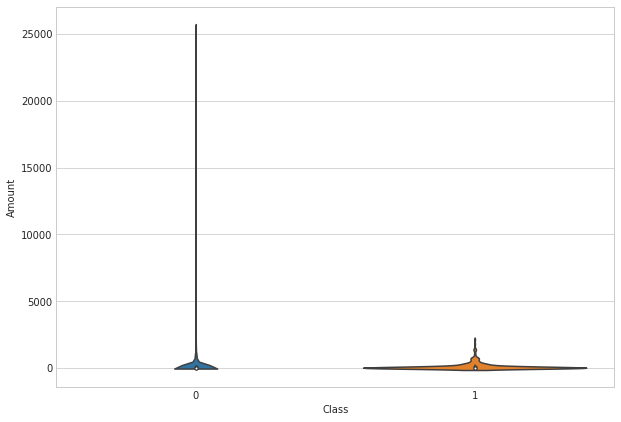

In [8]:
# Studying 'Amount' feature

fig, axs = plt.subplots(figsize=(10,7))

sns.violinplot(ax=axs, x=ccfd['Class'], y=ccfd['Amount']);

In [9]:
# (Q) What is the maximum amount for which a transaction was fraud

ccfd[ccfd['Class']==1]['Amount'].max()

2125.87

In [10]:
# Amount-distribution for genuine transactions

ccfd[ccfd['Class']==0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# Amount-distribution for fraud transactions

ccfd[ccfd['Class']==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# sum(amount) for transaction in 48 hours

print("Genuine: {}".format(sum(ccfd[ccfd['Class']==0]['Amount'])))
print("Fruad: {}".format(sum(ccfd[ccfd['Class']==1]['Amount'])))
print("Total(Genuine+Fraud): {}".format(sum(ccfd['Amount'])))


Genuine: 25102462.039983638
Fruad: 60127.96999999997
Total(Genuine+Fraud): 25162590.009983554


In [13]:
# (Q) How many transactions was of 0 amount

len(ccfd[ccfd['Amount']==0])

1825

###### Conclusions

1. ~**0.24%** (60128/25162590) of the total sum transacted in 48 hours was fraud.

2. On average, Amount for a fraud transaction is ~**33.92** (122.21-88.29) units higher than a genuine transaction.

2. Maximum amount for any fraud transaction is ~**8.3%** (2126/25691) of Maximum amount for all transactions.

3. ~**0.64%** (1825/284807) of transactions are found to be of zero-amount. Possible reasons for this could be:
    * The transaction Amount provided in the dataset must have been rounded down after certain decimal points.
    * Though the transaction did not succeed(due to technical/user failures), they were recorded by the machine
        * in this case, the average failure rate is ~**38 times per hour**

In [14]:
# Studying 'Time' feature

# counting frequency of transactions by hour

# lists to store count of transactions by hour
Count = [0]*24
gCount = [0]*24
fCount = [0]*24

hr = list(range(24))

# iterating each row in the dataframe
for index,row in ccfd.iterrows():
    
    # calculating hour from seconds
    hour = (int(row['Time'])//3600)%24
    
    Count[hour] += 1
    
    # checking genuine||fraud
    if row['Class']==1:
        fCount[hour] += 1
    else:
        gCount[hour] += 1


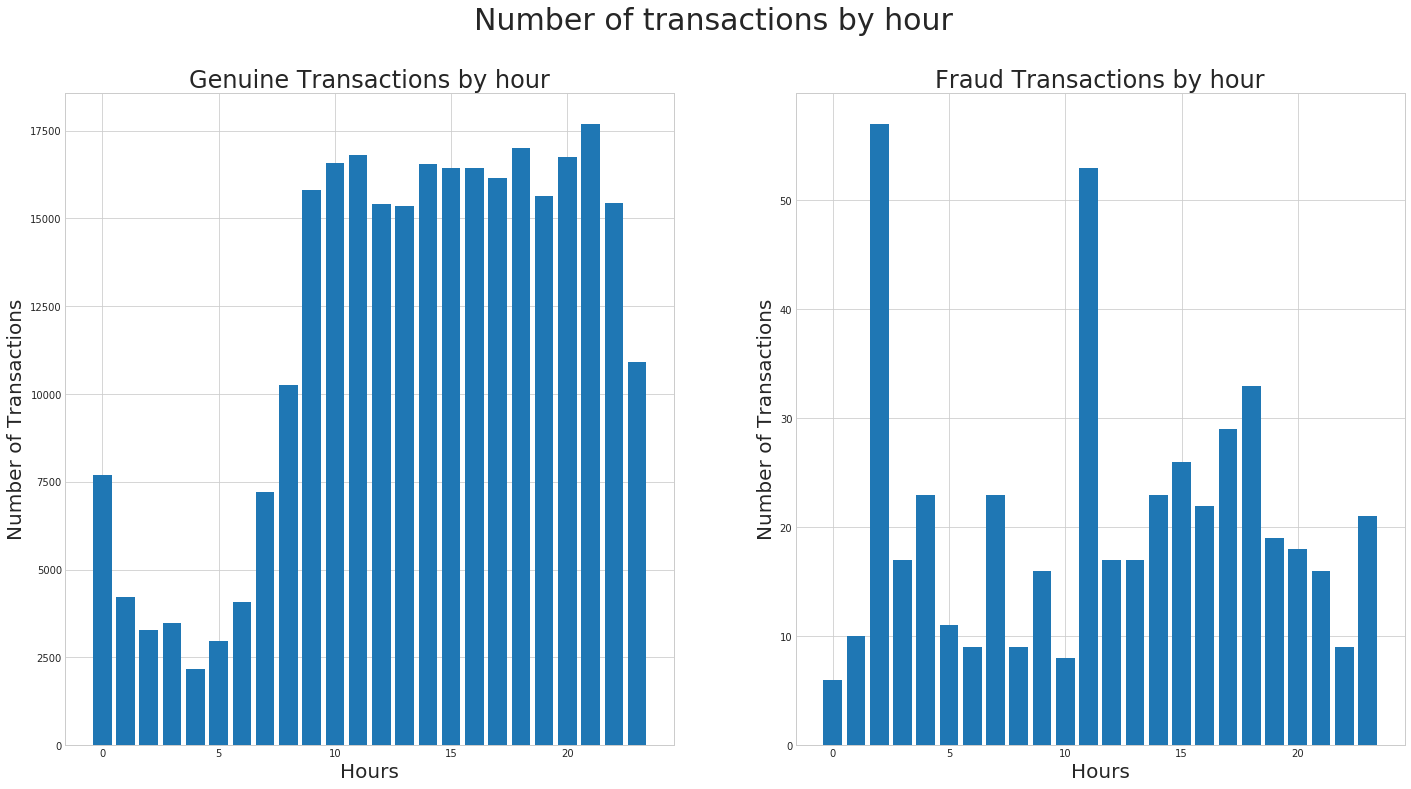

In [15]:
# ploting frequency of transactions by hour(genuine vs fraud)

fig, axs = plt.subplots(1, 2, figsize=(24,12))
plt.suptitle("Number of transactions by hour", fontsize=30);

plt.subplot(1,2,1)

plt.title('Genuine Transactions by hour', fontsize=24)
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Number of Transactions', fontsize=20)
plt.bar(hr,gCount);


plt.subplot(1,2,2)

plt.title('Fraud Transactions by hour', fontsize=24)
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Number of Transactions', fontsize=20)
plt.bar(hr,fCount);


plt.show()

In [16]:
# for every hour of day calculate % of fraud-transactions in that hour

# dictionary to store (hour : %-of-fraud-transaction-in-hour)
d = dict()

ttc = 0 
tfc = 0

for i in range(24):
    
    # calculating count of total-transactions and frauds between hours 1-7
    if i>0 and i<8:
        ttc += Count[i]
        tfc += fCount[i]
    
    # storing fraud% of each hour in dictionary-d
    d[i] = round(fCount[i]*100/Count[i],2)

In [17]:
# (Q) In which hours do most % of fraud transactions occur

print(sorted(d, key=d.get, reverse=True))

[2, 4, 3, 5, 7, 11, 1, 6, 18, 23, 17, 15, 14, 16, 19, 12, 13, 20, 9, 8, 21, 0, 22, 10]


In [18]:
# Between hours 1-7

# (Q) What % of  total-transactions occur
print("% of total-transactions: {}".format(ttc*100/284807))

# (Q) What % of fraud-transactions occur
print("% of fraud-transactions: {}".format(tfc*100/492))

% of total-transactions: 9.684804095404958
% of fraud-transactions: 30.48780487804878


###### Conclusions:
1. Though only ~**9.685%** of transactions occur between 1-7 hours, ~**30.488%** of frauds occur in the same-timeframe

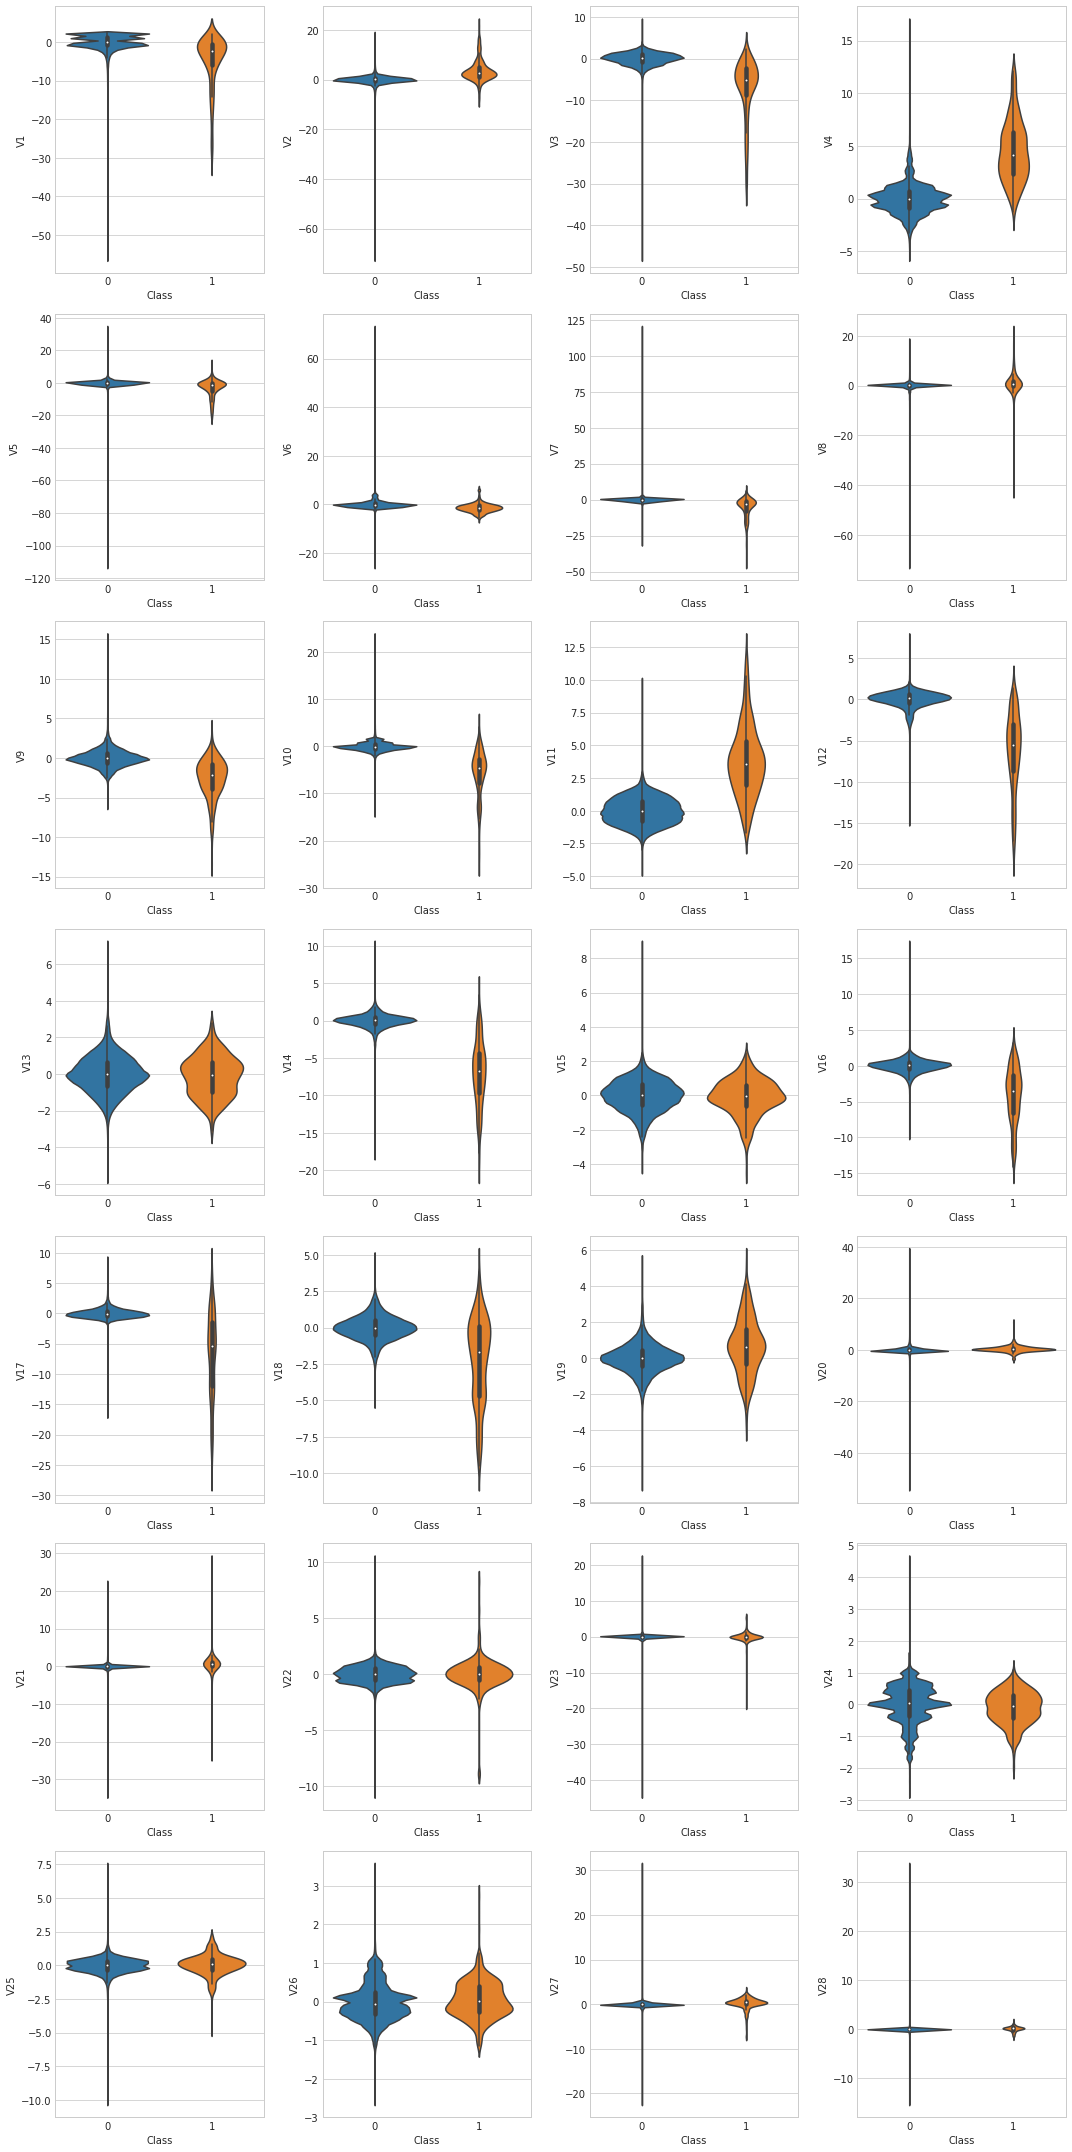

In [19]:
# violin-plots to show per-class distribution for PCA transformed features(V1,..,V28)

fig, axs = plt.subplots(7, 4, figsize=(15,30))

for i in range(1,29):
    sns.violinplot(ax=axs[(i-1)//4][(i-1)%4], x=ccfd['Class'], y=ccfd['V'+str(i)])
    
plt.tight_layout()

###### Conclusions:
1. Distribution for each PCA transformed variable(V1-V28) shows no significant differences for the 2 classes(genuine vs fraud)

**Similarity of transactions**

For a random sample,
given any transaction, which are the 10 most similar transactions to it?

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [21]:
sample_size = 1000
neighbours = 10 # must be <=sample_size

# pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
my_sample = ccfd.sample(sample_size)

# list of indices in my_sample
print("Index of random samples")
print(my_sample.index)

# using cosine_similarity, refer http://scikit-learn.org/ -
# - stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
my_sample_sim = cosine_similarity(my_sample)

sorted_my_sample_sim = np.sort(my_sample_sim)
#print(sorted_my_sample_sim)

# user input for query-row
query_index = int(input("Enter Query index (0-{}): ".format(sample_size-1)))
print()

# query row
query = my_sample.iloc[query_index]

print("given transaction id = {}, Amount = {}, class = {}\n"
      .format(query.name, query['Amount'], query['Class']))

# 10 rows with highest similarity 
min_10 = my_sample_sim[query_index].argsort()[:sample_size-2-neighbours:-1]

print("Similar Transactions")
count = 1
for i in min_10:
    
    item = my_sample.iloc[i]
    
    print("\t{}. trans-id = {}, similarity= {}, Amount = {}, class = {}"
          .format(count, item.name, my_sample_sim[query_index][i],
                  item['Amount'], item['Class'] ))
    
    count += 1
    

Index of random samples
Int64Index([169659,  83775, 228465,  94275, 107938, 251431, 254871,  51708,
            149268,  87000,
            ...
            219406, 263110, 145080,  14676, 151033,  57944,  44050, 158781,
             37126,  90479],
           dtype='int64', length=1000)
Enter Query index (0-999): 67

given transaction id = 249419, Amount = 92.4, class = 0.0

Similar Transactions
	1. trans-id = 249419, similarity= 0.9999999999999998, Amount = 92.4, class = 0.0
	2. trans-id = 271811, similarity= 0.9999999996360052, Amount = 97.28, class = 0.0
	3. trans-id = 199449, similarity= 0.9999999991715189, Amount = 79.59, class = 0.0
	4. trans-id = 217439, similarity= 0.9999999991315733, Amount = 80.03, class = 0.0
	5. trans-id = 242358, similarity= 0.9999999990192626, Amount = 89.0, class = 0.0
	6. trans-id = 266885, similarity= 0.9999999989965417, Amount = 101.98, class = 0.0
	7. trans-id = 241806, similarity= 0.999999998709141, Amount = 85.9, class = 0.0
	8. trans-id = 138456, 